                       DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING                                

Objective:           
                                                  
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.              
                  
Dataset:           

Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.


Tasks:                     

1.	Handle missing values as per the best practices (imputation, removal, etc.).           
●	Apply scaling techniques to numerical features:                              
        --  a. Standard Scaling   b. Min-Max Scaling                                     
●	Discuss the scenarios where each scaling technique is preferred and why.     


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("adult_with_headers.csv")
print("Dataset is Loaded Successfully\n")
df.head()

Dataset is Loaded Successfully



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [8]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [12]:
df.replace('?', np.nan, inplace=True)


In [13]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns


In [14]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\kanch\AppData\Local\Temp\ipykernel_13016\1925696021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [15]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\kanch\AppData\Local\Temp\ipykernel_13016\3421764164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\kanch\AppData\Local\Temp\ipykernel_13016\3421764164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [16]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [17]:
num_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Standard Scaling
std_scaler = StandardScaler()
df_std = df.copy()
df_std[num_features] = std_scaler.fit_transform(df_std[num_features])

# Min-Max Scaling
mm_scaler = MinMaxScaler()
df_mm = df.copy()
df_mm[num_features] = mm_scaler.fit_transform(df_mm[num_features])

In [18]:
print("Standard Scaled values (first 3 rows):\n")
print(df_std[num_features].head(3))

print("\nMin-Max Scaled values (first 3 rows):")
print(df_mm[num_features].head(3))

Standard Scaled values (first 3 rows):

        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  

Min-Max Scaled values (first 3 rows):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  


1. Standard Scaling:
- Centers data around mean = 0 and standard deviation = 1.
- Preferred for algorithms assuming normal distribution (e.g., Logistic Regression, SVM).

2. Min-Max Scaling:
- Rescales all values to range [0, 1].
- Useful for algorithms based on distance (e.g., KNN, Neural Networks).

2. Encoding Techniques:                              

●	Apply One-Hot Encoding to categorical variables with less than 5 categories.                             
●	Use Label Encoding for categorical variables. Data Exploration and Preprocessing:                       
●	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).          
●	les with more than 5 categories.                                      
●	Discuss the pros and cons of One-Hot Encoding and Label Encoding.                             


In [21]:
print(df.describe(include='all'))

                 age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital_status       occupation relationship    race    sex  \
count                 32561            32561   

In [22]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [26]:
print("Unique category counts in categorical features:\n")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} ")


Unique category counts in categorical features:

workclass: 9 
education: 16 
marital_status: 7 
occupation: 15 
relationship: 6 
race: 5 
sex: 2 
native_country: 42 
income: 2 


In [27]:
low_cardinality = [col for col in cat_cols if df[col].nunique() <= 5]
high_cardinality = [col for col in cat_cols if df[col].nunique() > 5]

In [28]:
# One-Hot Encoding for low-cardinality columns
df_ohe = pd.get_dummies(df, columns=low_cardinality, drop_first=True)  

In [29]:
# Label Encoding for high-cardinality columns
df_le = df.copy()
le = LabelEncoder()
for col in high_cardinality:
    df_le[col] = le.fit_transform(df_le[col])

In [30]:
print("Shape after One-Hot Encoding:\n", df_ohe.shape)
print("Shape after Label Encoding:", df_le.shape)

Shape after One-Hot Encoding:
 (32561, 18)
Shape after Label Encoding: (32561, 15)


1. One-Hot Encoding           
                 
- Pros:
                                                                       
     * No ordinal (order) relationship is assumed between categories.                  
                                                                               
     * Works well for features with a small number of unique categories (low cardinality).   

- Cons:
                               
     * Increases dataset dimensionality by creating additional columns.                           
                                           
     * Can lead to higher memory usage and slower model training.                 
                                  
2. Label Encoding                          
                 
- Pros:                  
                           
     * Simple and memory-efficient (encodes categories as integers).                          
                                                             
     * Useful for tree-based models like Decision Trees and Random Forests.                         
                                                                                              
- Cons:                       
                  
     * Imposes a false ordinal relationship between categories (e.g., 0 < 1 < 2), which can mislead models that use distances or linear relationships (like Logistic Regression or SVM).

3. Feature Engineering:                                                                                              
●	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.     
●	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice. 


In [32]:
df['capital_diff'] = df['capital_gain'] - df['capital_loss']
df['working_hours_per_age'] = df['hours_per_week'] / df['age']

print("\nNew Features created successfully: 'capital_diff', 'working_hours_per_age'")



New Features created successfully: 'capital_diff', 'working_hours_per_age'


- capital_diff': Represents net gain/loss, indicating financial activity.          
                                                            
- 'working_hours_per_age': Indicates work intensity relative to age, possibly linked to income level.

In [34]:
print("Skewness before transformation:\n")
print(df[num_features].skew())


Skewness before transformation:

age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64


In [36]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])

print("\nSkewness after applying log transformation on 'capital_gain':\n")
print(df['capital_gain_log'].skew())


Skewness after applying log transformation on 'capital_gain':

3.096143524467517


Text(0.5, 1.0, 'Before Log Transformation')

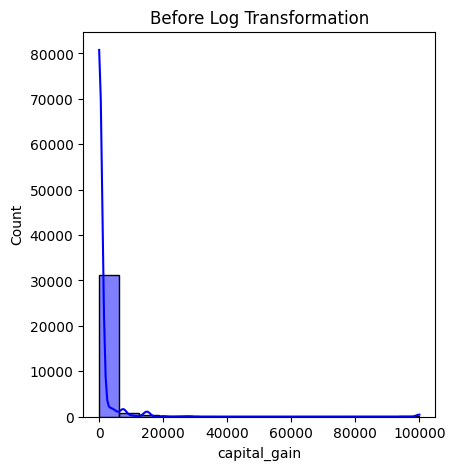

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['capital_gain'], kde=True, color='blue')
plt.title('Before Log Transformation')

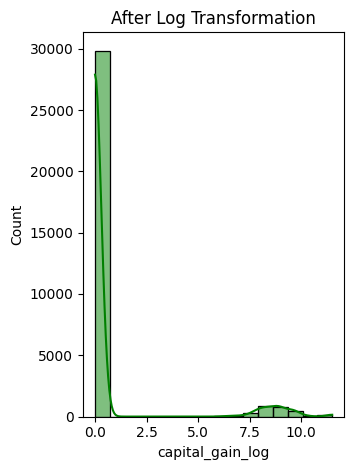

In [38]:
plt.subplot(1,2,2)
sns.histplot(df['capital_gain_log'], kde=True, color='green')
plt.title('After Log Transformation')

plt.tight_layout()
plt.show()

* The feature capital_gain was highly right-skewed, meaning most values were near zero with a few large outliers.     
                                                                                                        
* Applying a log transformation (np.log1p(capital_gain)) compresses large values and spreads smaller ones.
                                                                     
* This reduces skewness, makes the data distribution more normal, and helps machine learning models interpret relationships more effectively.               
                                 
* It also prevents extreme outliers from dominating model learning, leading to better stability and accuracy.